# Computer Vision Bootcamp: Assignment 1

## Reading

Take a photo of any object in your room using your mobile or laptop's camera

Upload the image into Colab. Then read the image

In [2]:
# Import the needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# read the image
I = cv2.imread('image.jpg')

Resize the image to 512*512 pixels using the resize function in OpenCV

In [12]:
resized_image = cv2.resize(I, (512, 512))

## Converting

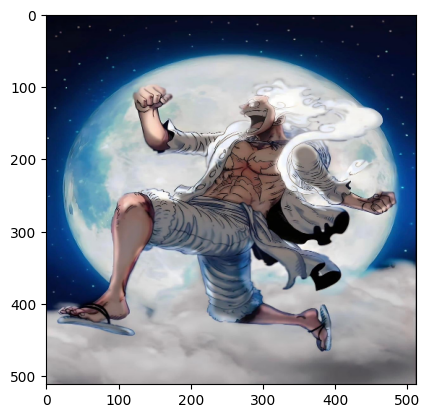

In [13]:
# Convert the reseized image to RGB
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# show the rgb image
plt.imshow(rgb_image, cmap='gray')
plt.show()

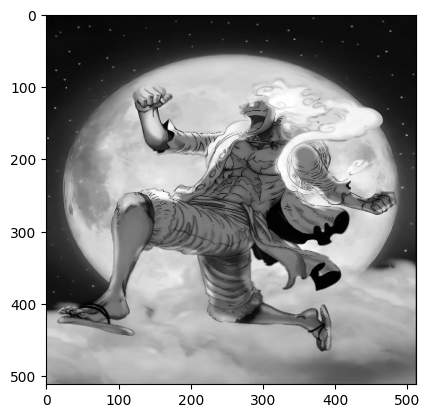

In [14]:
# Convert the reseized image to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# show the reseized gray image
plt.imshow(gray_image, cmap='gray')
plt.show()

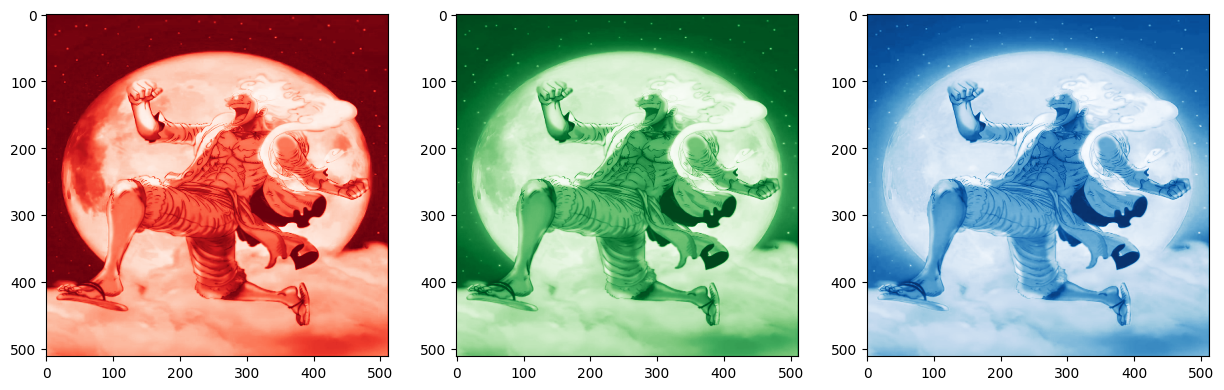

In [15]:
# Split the reseized image into its three color channels
R, G, B = cv2.split(rgb_image)

# show the channels in one plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds_r')


plt.subplot(1, 3, 2)
plt.imshow(G, cmap='Greens_r')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='Blues_r')

plt.show()

## Convolutions

### Smoothing

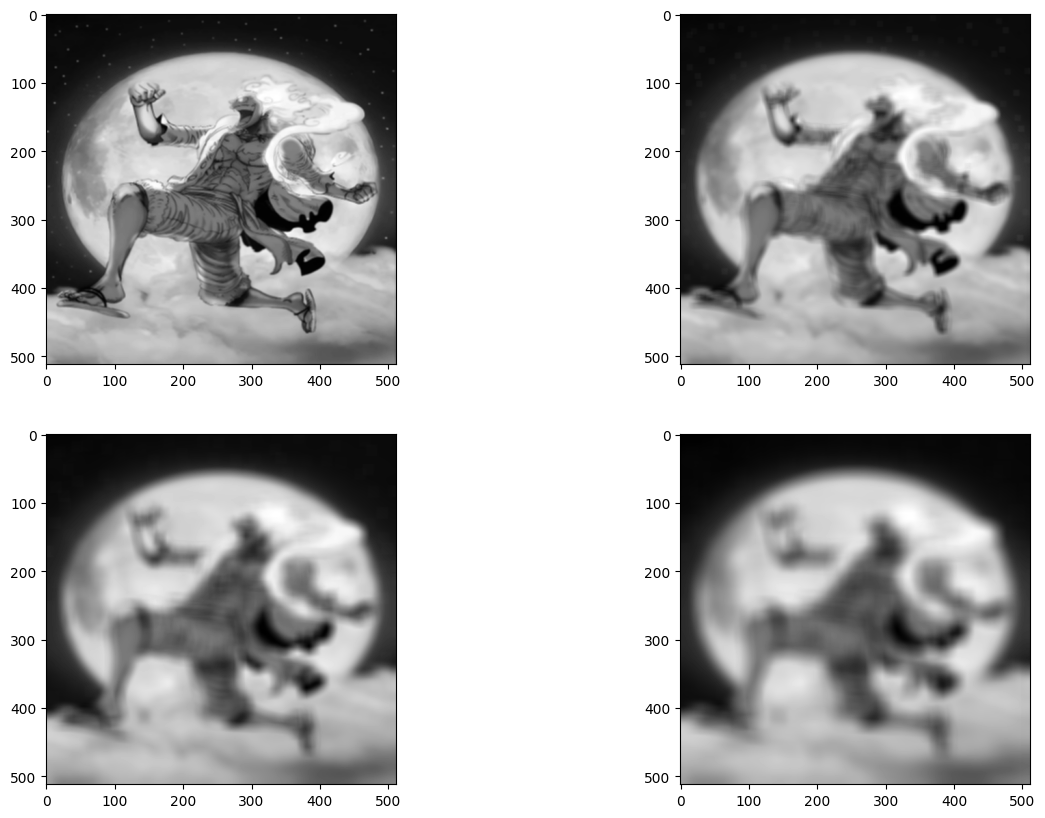

In [16]:
# convole the image with Box mask of size 3, 9, 17, 25 and plot the four results in one plot
box_sizes = [3, 9, 17, 25]
output_images = []

for size in box_sizes:
    mask = np.ones((size, size)) / (size ** 2)
    output_images.append(cv2.filter2D(gray_image, -1, mask))

plt.figure(figsize=(15, 10))
for i in range(len(output_images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(output_images[i], cmap='gray')

plt.show()

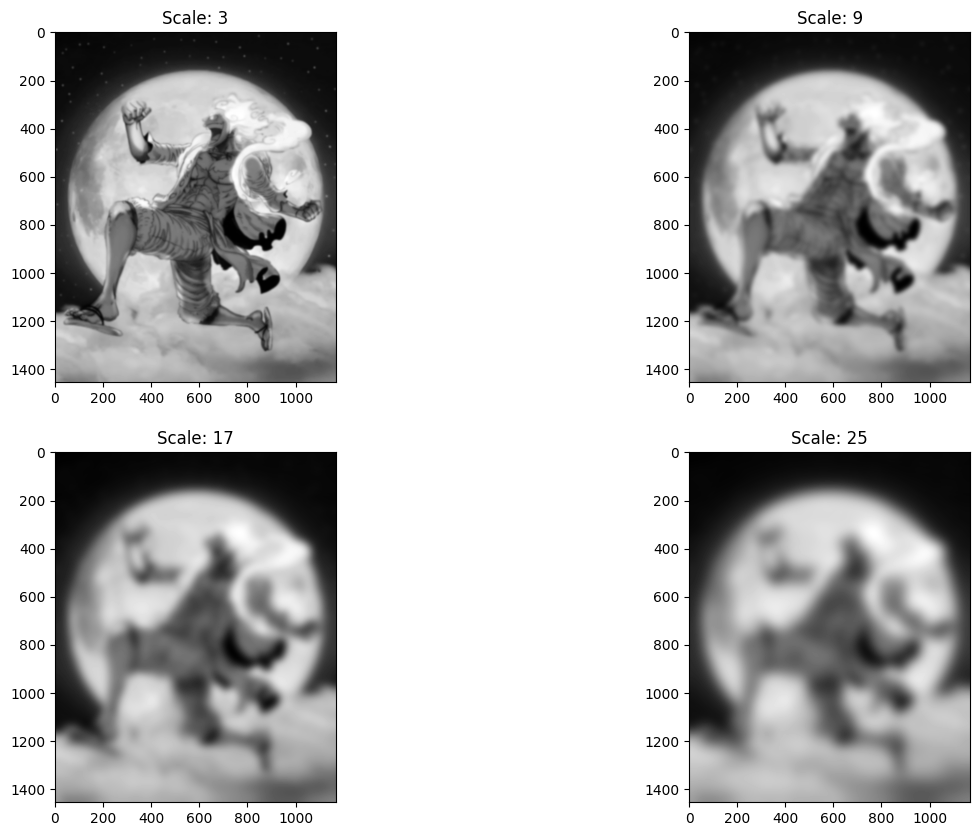

In [17]:
# convole the image with Gaussian mask of Scale 3, 9, 17, 25 (choose suitable mask size) and plot the four results in one plot
scales = [3, 9, 17, 25]

gaussian_images = []

for scale in scales:
    mask_size = 6 * scale + 1
    blurred = cv2.GaussianBlur(I, (mask_size, mask_size), scale)
    gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    gaussian_images.append(gray_blurred)

plt.figure(figsize=(15, 10))

for i in range(len(scales)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(gaussian_images[i], cmap='gray')
    plt.title(f'Scale: {scales[i]}')

plt.show()

### Difference

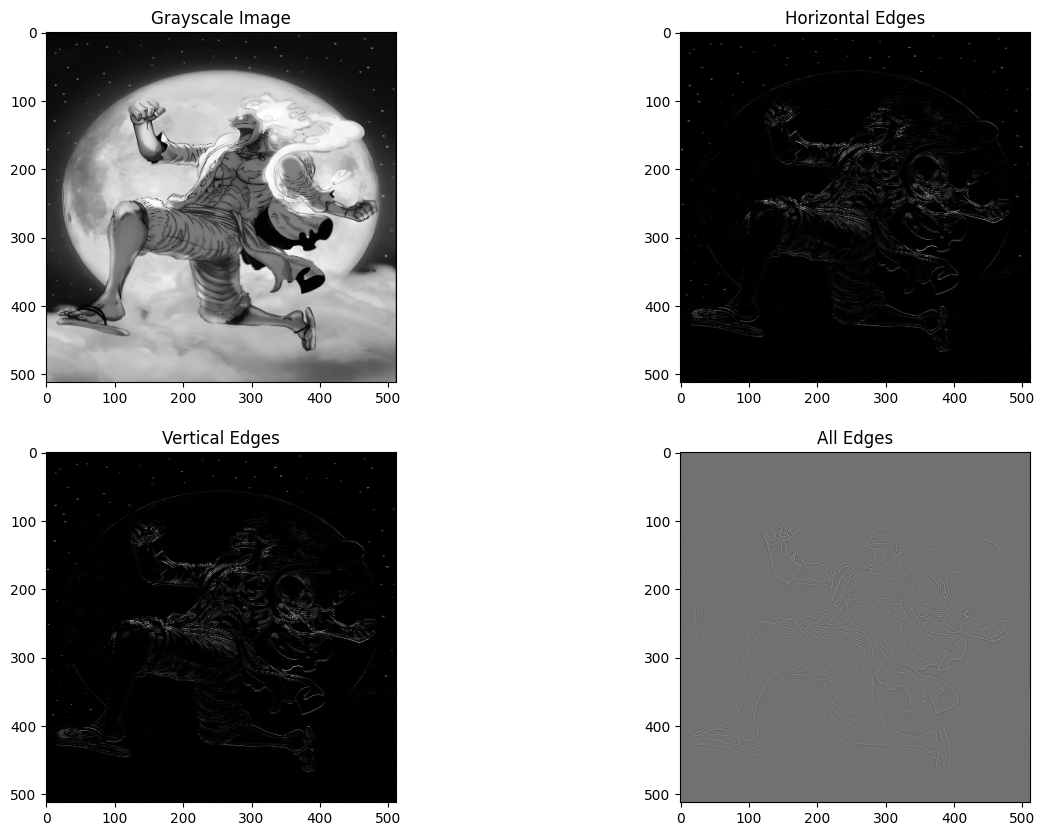

In [18]:
# convole the image with horizontal mask to catch vertical edges
horizontal_mask = np.array([-1, 2, -1])
horizontal_edges = cv2.filter2D(gray_image, -1, horizontal_mask)

# convole the image with vertical mask to catch horizontal edges
vertical_mask = np.array([[-1],
                          [2],
                          [-1]])
vertical_edges = cv2.filter2D(gray_image, -1, vertical_mask)

# convole the image with a Laplacian mask to catch all edges
laplacian_edges = cv2.Laplacian(gray_image, cv2.CV_64F)

# plot the three figures along with the gray scale resized image in one plot (4 images in total: grayscale, vertical edges, horizontal edges, and all edges)
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(2, 2, 2)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges')

plt.subplot(2, 2, 3)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges')

# Plot all edges
plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('All Edges')

plt.show()